In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,LeaveOneOut
from sklearn.linear_model import  LinearRegression
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('Final_preprocess.csv')
data.head()

,num-of-doors,body-style,drive-wheels,num-of-cylinders,fuel-system,price,aspiration_turbo,engine-location_rear,gas,diesel,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price.1
0,2,0,1.0,4,5,0.319261,0,0,0.0,1.0,...,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223,13495.0
1,2,0,1.0,4,5,0.720545,0,0,0.0,1.0,...,-0.004148,0.238187,0.520966,-2.123963,-0.291435,0.386571,-0.248239,-0.652249,-0.551223,16500.0
2,2,2,1.0,6,5,0.720545,0,0,0.0,1.0,...,0.543118,0.794608,-2.433363,0.783486,-0.291435,1.364889,-0.248239,-0.964397,-0.707273,16500.0
3,4,3,2.0,4,5,0.385449,0,0,0.0,1.0,...,-0.424051,-0.388042,-0.526138,0.525864,-0.041121,0.134349,0.799996,-0.184027,-0.083072,13950.0
4,4,3,0.0,5,5,0.832283,0,0,0.0,1.0,...,0.545108,0.398703,-0.526138,0.525864,-0.541748,0.492227,0.799996,-1.120471,-1.331474,17450.0


In [ ]:
data.drop('price.1', axis=1, inplace=True)

In [ ]:
slr=data[['horsepower','price']]
slr.head(2)

,horsepower,price
0,0.386571,0.319261
1,0.386571,0.720545


In [ ]:
X=slr.horsepower
y=slr.price
Xc=sm.add_constant(X)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(Xc,y,test_size=0.3,random_state=10)

In [ ]:
model1= sm.OLS(y,Xc).fit()


In [ ]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     478.0
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           8.25e-55
Time:                        10:08:02   Log-Likelihood:                -162.15
No. Observations:                 201   AIC:                             328.3
Df Residuals:                     199   BIC:                             334.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.229e-15      0.038   -3.2e-14      1.0

In [ ]:
model1.fittedvalues

0      0.324828
1      0.324828
2      1.146890
3      0.112891
4      0.413609
         ...   
196    0.391704
197    1.242977
198    0.797370
199    0.209283
200    0.391704
Length: 201, dtype: float64

In [ ]:
model1.pvalues

const         1.000000e+00
horsepower    8.253795e-55
dtype: float64

In [ ]:
model1.df_resid

199.0

In [ ]:
model1.params

const        -1.229025e-15
horsepower    8.402808e-01
dtype: float64

In [ ]:
y_pred=model1.predict(Xc)

# Measure of variation

In [ ]:
# Sum of sq residuals (SSR)

ssr= np.sum((y_pred-y.mean())**2)
ssr

141.92043152050445

In [ ]:
# Sum of sq error (SSE)

sse= np.sum((y_pred-y)**2)
sse

59.079568479495535

In [ ]:
# Sum of sq total (SST)
sst= np.sum((y-y.mean())**2)
sst

201.00000000000003

In [ ]:
ssr+sse

201.0

In [ ]:
model1.rsquared

0.7060717986094749

In [ ]:
ssr/sst

0.7060717986094748

# Interpretation of coefficients

# T-test and f-test, confidence interval

# MLR

In [ ]:
y=data.price
X=data.drop('price',axis=1)
Xc=sm.add_constant(X)
model2=sm.OLS(y,Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     100.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           8.03e-91
Time:                        10:08:11   Log-Likelihood:                -6.6407
No. Observations:                 201   AIC:                             67.28
Df Residuals:                     174   BIC:                             156.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5252      0.328     -1.600      0.111      -1.173       0.123
num-of-doors             0.0899      0.032      2.777      0.006       0.026       0.154
body-style              -0.0848      0.037     -2.265      0.025      -0.159      -0.011
drive-wheels            -0.0915      0.054     -1.696      0.092      -0.198       0.015
num-of-cylinders        -0.0108      0.063     -0.170      0.865      -0.136       0.114
fuel-system              0.0148      0.016      0.951      0.343      -0.016       0.046
aspiration_turbo        -0.2315      0.100     -2.305      0.022      -0.430      -0.033
engine-location_rear     0.5305      0.226      2.348      0.020       0.085       0.976
gas                      0.0565      0.446      0.127      0.899      -0.824       0.937
diesel                  -0.5817      0.305     -1.906      0.058      -1.184       0.021
make_target_encode    2.918e-05   1.03e-05      2.842      0.005    8.92e-06    4.94e-05
target_enc2            5.02e-05   3.45e-05      1.456      0.147   -1.78e-05       0.000
freq_enc_engine_type     0.1998      0.111      1.798      0.074      -0.019       0.419
symboling                0.0304      0.029      1.061      0.290      -0.026       0.087
normalized-losses        0.0117      0.025      0.462      0.645      -0.038       0.062
wheel-base               0.0225      0.060      0.376      0.707      -0.095       0.140
length                   0.0495      0.070      0.708      0.480      -0.088       0.187
width                    0.0687      0.051      1.360      0.176      -0.031       0.169
height                  -0.0078      0.032     -0.240      0.811      -0.072       0.056
curb-weight              0.2455      0.088      2.775      0.006       0.071       0.420
engine-size             -0.0786      0.118     -0.666      0.506      -0.312       0.154
bore                    -0.0548      0.046     -1.202      0.231      -0.145       0.035
stroke                  -0.0259      0.036     -0.723      0.471      -0.097       0.045
compression-ratio       -0.0438      0.193     -0.227      0.820      -0.424       0.336
horsepower               0.4445      0.092      4.835      0.000       0.263       0.626
peak-rpm                -0.0092      0.034     -0.268      0.789      -0.077       0.059
city-mpg                 0.0077      0.076      0.101      0.920      -0.143       0.158
highway-mpg             -0.0700      0.080     -0.876      0.382      -0.228       0.088
==============================================================================
Omnibus:                        8.436   Durbin-Watson:                   1.216
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.736
Skew:                           0.303   Prob(JB):                      0.00466
Kurtosis

In [ ]:
#assumptions
#1. Multico-linearity
#2. Normality of residuals
#3. autocorrelation
#4. heteroscadesticity
#5. Linearity

In [ ]:
#X.corr()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X.columns

Index(['num-of-doors', 'body-style', 'drive-wheels', 'num-of-cylinders',
       'fuel-system', 'aspiration_turbo', 'engine-location_rear', 'gas',
       'diesel', 'make_target_encode', 'target_enc2', 'freq_enc_engine_type',
       'symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [ ]:
Vif=pd.DataFrame()
Vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
Vif['features']=X.columns
Vif=Vif.sort_values('vif',ascending=False).reset_index(drop=True)
Vif

,vif,features
0,507.257476,diesel
1,144.114614,gas
2,103.293351,compression-ratio
3,38.787630,engine-size
4,23.511030,horsepower
5,21.765974,curb-weight
6,17.752386,highway-mpg
7,16.216880,city-mpg
8,14.669117,make_target_encode
9,13.567019,length


In [ ]:
for ind in range(len(df_numeric_features_vif.columns)):

    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    vif["Features"] = df_numeric_features_vif.columns
    multi = vif[vif['VIF_Factor'] > 10]
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

NameError: ignored

In [ ]:
#Linearity

model2.resid

0     -0.049539
1      0.351746
2     -0.086118
3      0.065181
4     -0.102452
         ...   
196   -0.038099
197   -0.094623
198    0.291682
199    0.144536
200    0.700548
Length: 201, dtype: float64

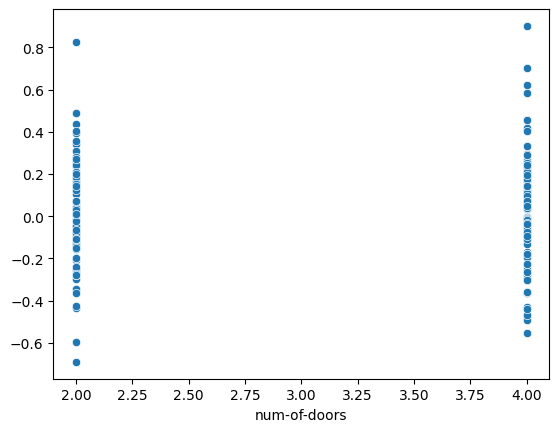

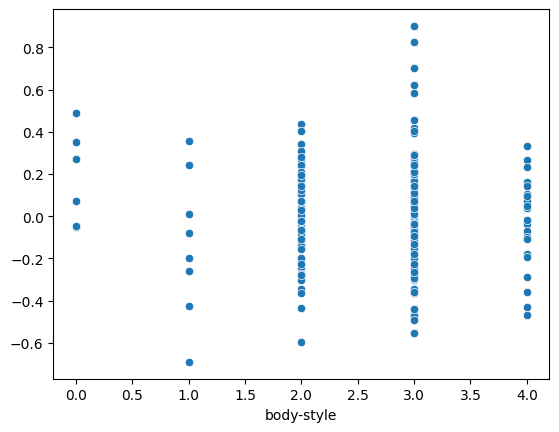

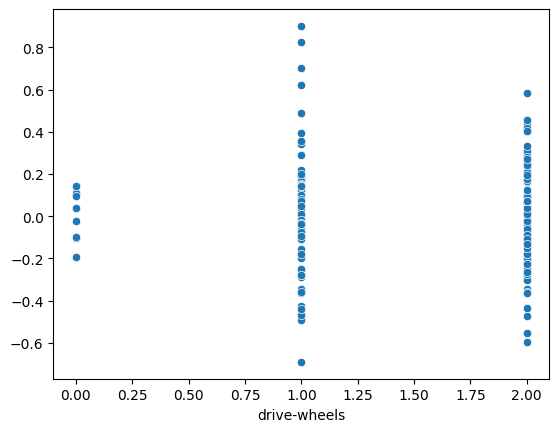

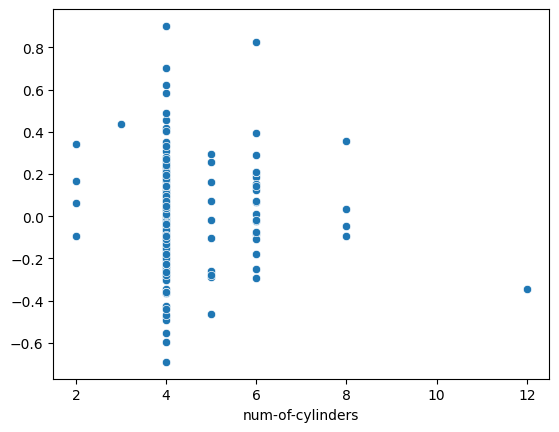

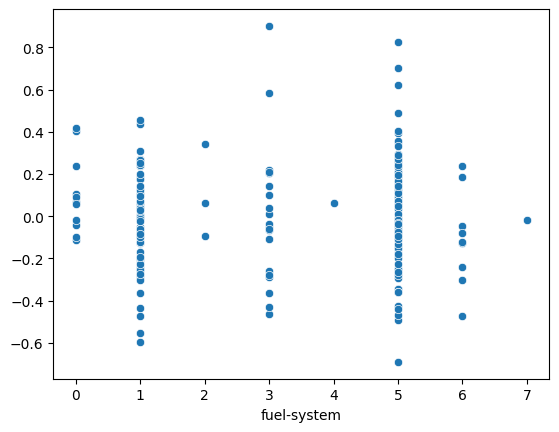

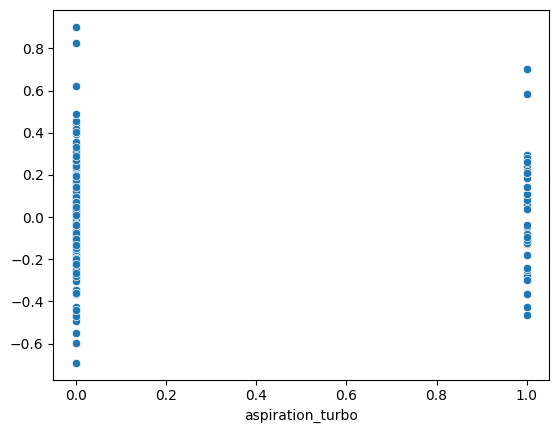

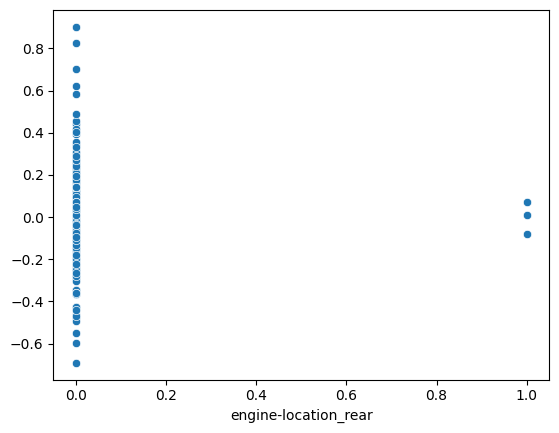

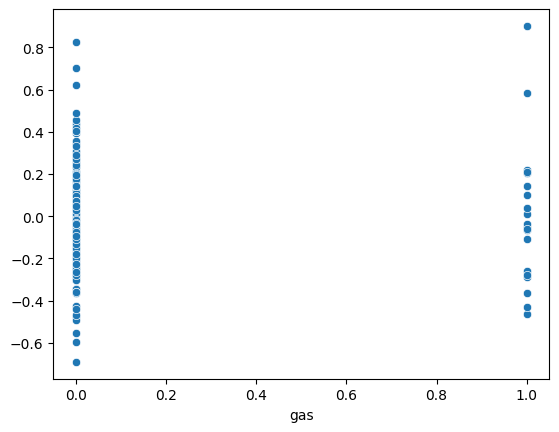

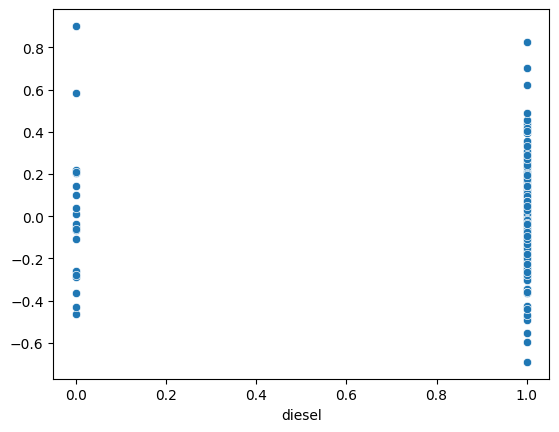

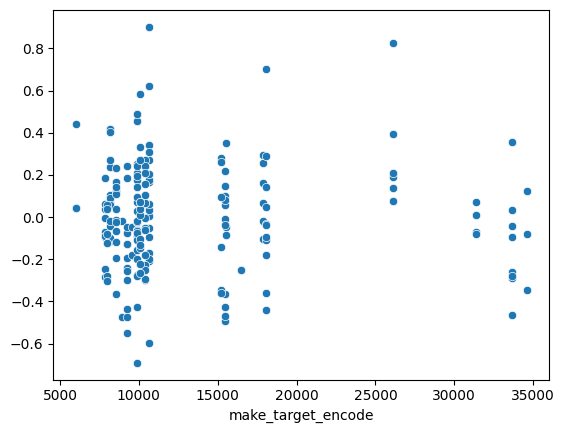

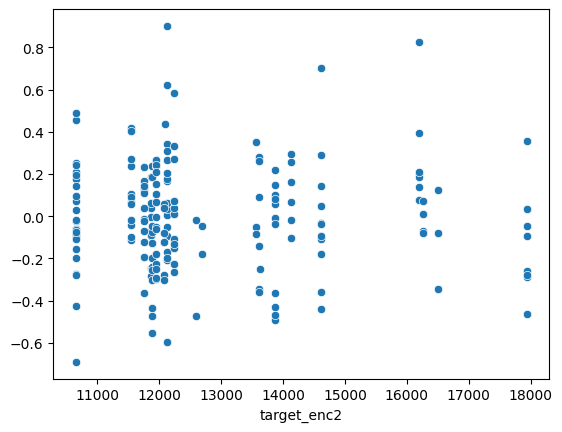

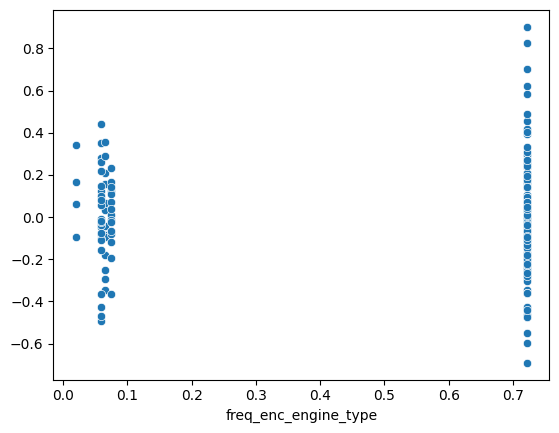

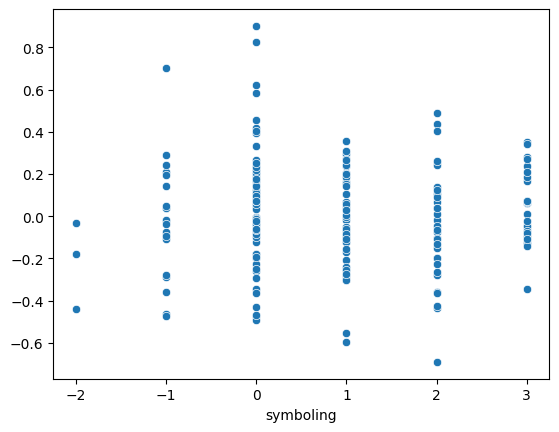

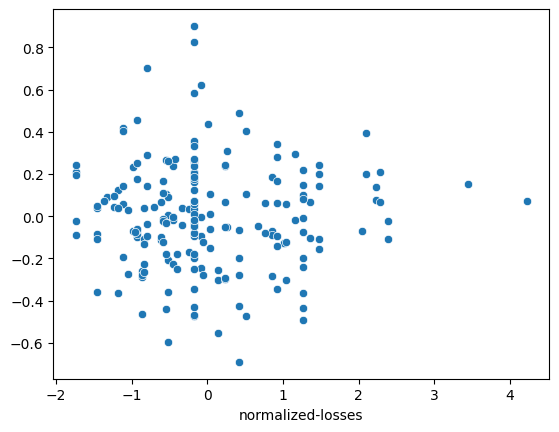

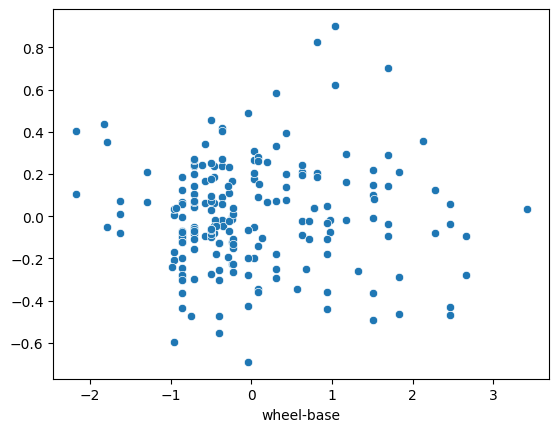

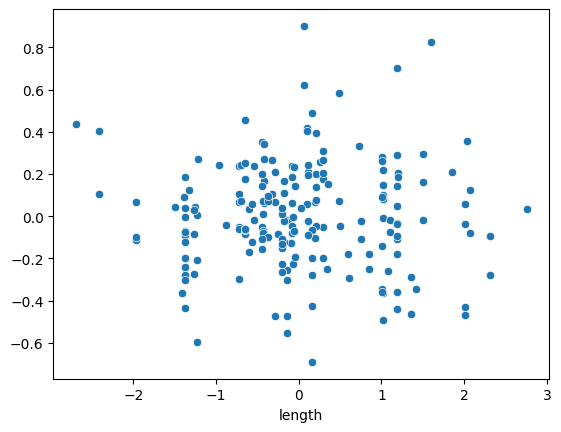

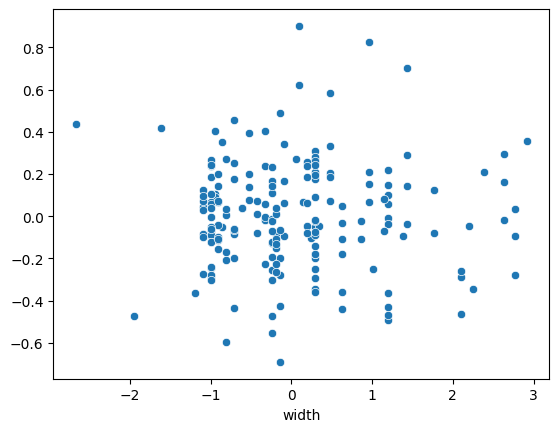

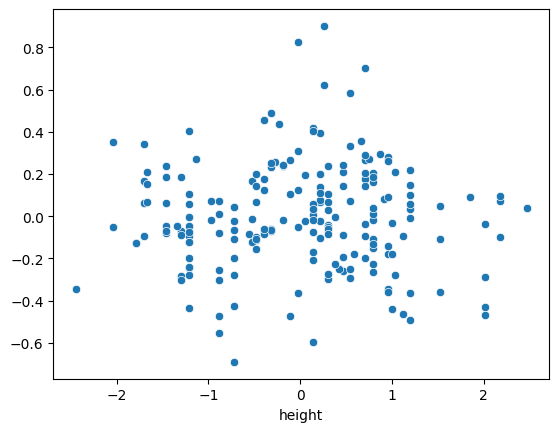

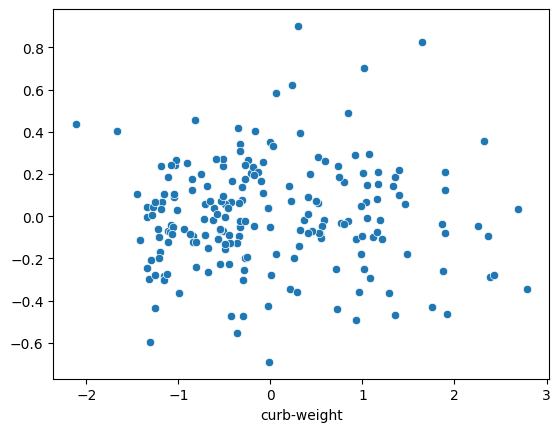

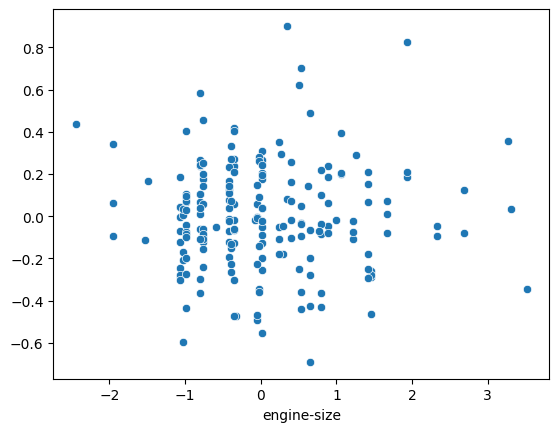

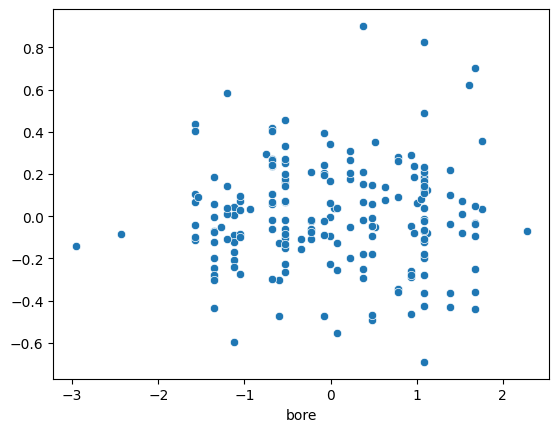

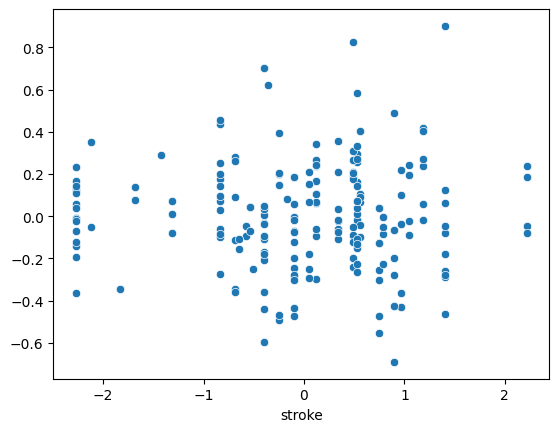

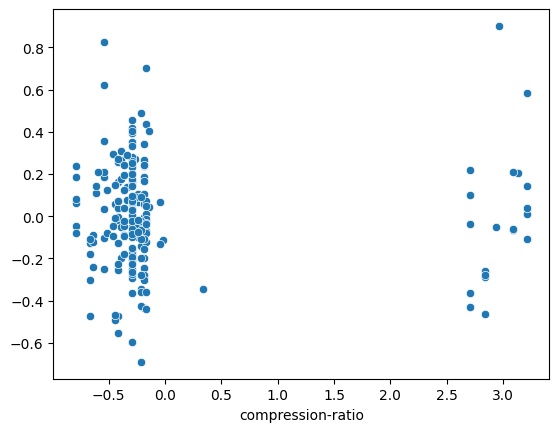

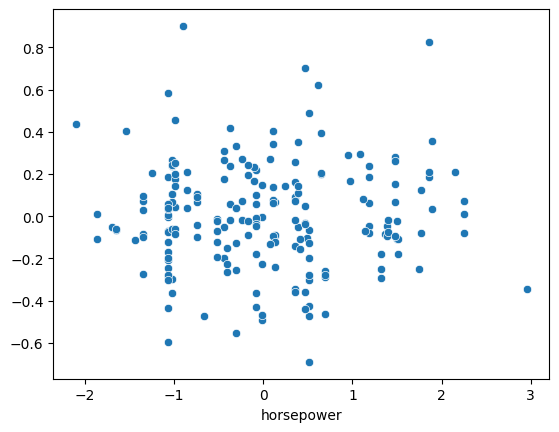

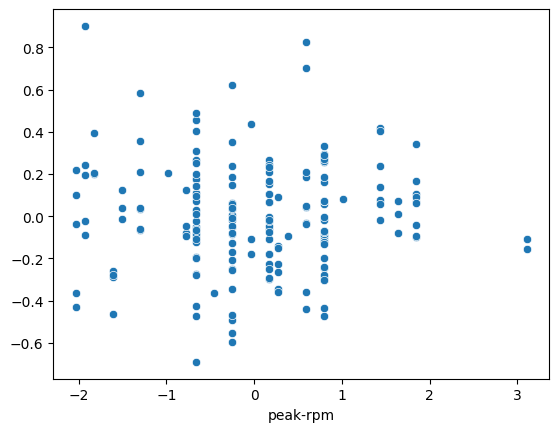

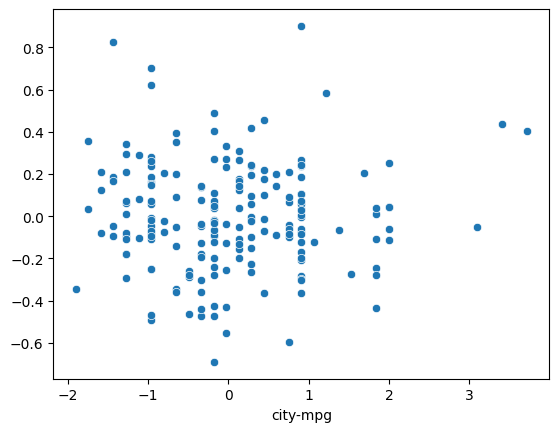

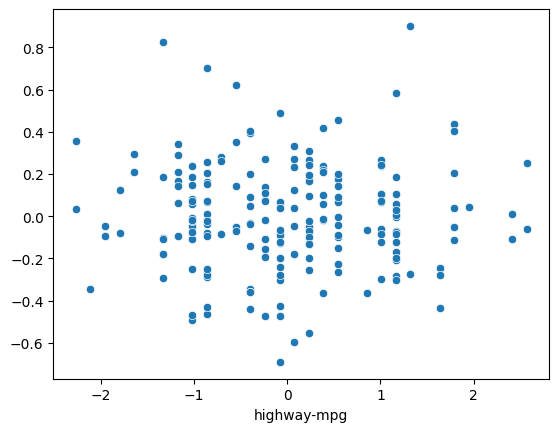

In [ ]:
for i in X.columns:
  sns.scatterplot(x=X[i],y=model2.resid)
  plt.show()

In [ ]:
## Linear relationship between dependent and independent attributes
# linear rainbow test
# plots (scatter)

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(model2, frac=0.45)

(1.1922168305437153, 0.22407876346004163)

In [ ]:
## Normality of residuals
# .skew()
# shapiro
# qq plots
# jarque berra test




In [ ]:
## Auto correlation
# Darbin Watson test

<Axes: >

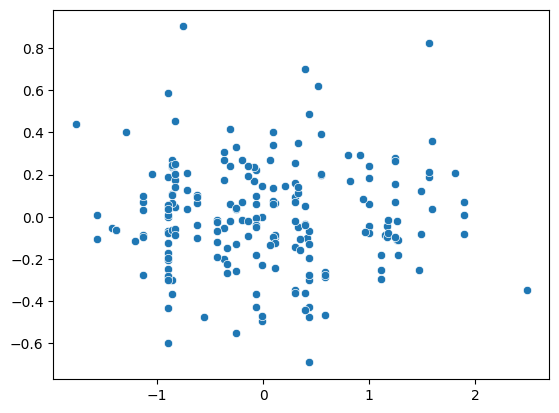

In [ ]:
## Hetero scadisticity
sns.scatterplot(x=y_pred,y=model2.resid)


<Axes: >

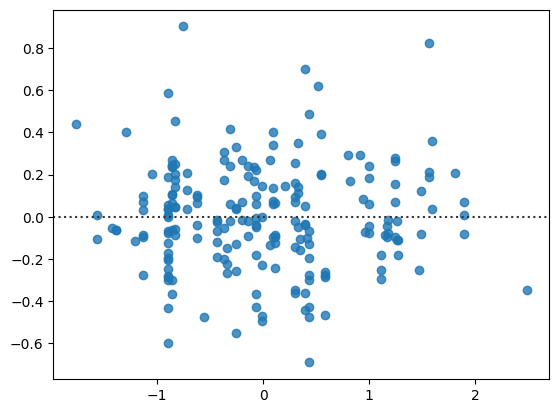

In [ ]:
sns.residplot(x=y_pred,y=model2.resid)

In [ ]:
# goldfeld quant test
# breusch pagan test



In [ ]:
# Interpretations
#1. Co-efficients
#2.
